In [19]:
from pathlib import Path
from datatree import DataTree
import xarray as xr
import pandas as pd
import numpy as np

import valenspy as vp
from valenspy.cf_checks import cf_status, is_cf_compliant

In [20]:

def ALARO_CF_compliance_pr(ds):
    ds = ds.rename({'SURFPREC_decum': 'pr'})
    return ds

In [21]:
levels = ["level01","level02","level03","level04"]
data_tree = {}
for level in levels:
    files = list(Path(f"/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/DYDOCASE/export/long/{level}/pr/output/").rglob('*.nc'))
    ds = xr.open_mfdataset(files, combine='by_coords', chunks="auto")
    data_tree[level] = ALARO_CF_compliance_pr(ds)

OSError: no files to open

In [22]:
level="level01"
files = list(Path(f"/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/DYDOCASE/export/long/{level}/pr/output/").rglob('*.nc'))
ds = xr.open_mfdataset(files, combine='by_coords', chunks="auto")
ds

<xarray.Dataset> Size: 137GB
Dimensions:             (time: 271752, y: 251, x: 251, bnds: 2)
Coordinates:
  * x                   (x) float64 2kB -3.125e+06 -3.1e+06 ... 3.125e+06
  * y                   (y) float64 2kB 2.974e+06 2.999e+06 ... 9.224e+06
  * time                (time) datetime64[ns] 2MB 1992-01-01T01:00:00 ... 202...
    time_bnds           (time, bnds) datetime64[ns] 4MB dask.array<chunksize=(744, 2), meta=np.ndarray>
    lon                 (y, x) float64 504kB dask.array<chunksize=(251, 251), meta=np.ndarray>
    lat                 (y, x) float64 504kB dask.array<chunksize=(251, 251), meta=np.ndarray>
    lambert_projection  int64 8B 0
Dimensions without coordinates: bnds
Data variables:
    pr                  (time, y, x) float64 137GB dask.array<chunksize=(528, 178, 178), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.11
    title:        Climate model data
    institution:  Ghent University
    source:       ALARO-1 (CY43T2) - SURFEX v8.0
    history:      2024-04-24 14:46:52.653066 Python
    references:   
    comments:

ValueError: replacement dimension 'lon' is not a 1D variable along the old dimension 'x'

In [4]:
dt = DataTree.from_dict(data_tree)
dt

DataTree('None', parent=None)
├── DataTree('level01')
│       Dimensions:    (ydim: 251, xdim: 251, validdate: 280512)
│       Coordinates:
│         * xdim       (xdim) float64 2kB -3.125e+06 -3.1e+06 ... 3.1e+06 3.125e+06
│         * ydim       (ydim) float64 2kB 2.974e+06 2.999e+06 ... 9.199e+06 9.224e+06
│         * validdate  (validdate) datetime64[ns] 2MB 1991-01-01T01:00:00 ... 2023-01-01
│           basedate   (validdate) datetime64[ns] 2MB dask.array<chunksize=(744,), meta=np.ndarray>
│       Data variables:
│           pr         (ydim, xdim, validdate) float64 141GB dask.array<chunksize=(178, 178, 528), meta=np.ndarray>
│       Attributes: (12/29)
│           fillvalue:      1e+32
│           basedate:       1991-01-01
│           timestep:       450
│           projection:     lcc
│           lon_0:          9.899999999999999
│           lat_1:          49.0
│           ...             ...
│           refpressure:    101325.0
│           A_list:         [0.         0.00010731 0.00030401 0.00071116 0.00129123 0...
│           B_list:         [0.         0.         0.         0.         0.         0...
│           var_presision:  double
│           Conventions:    None - ALARO model output
│           history:        ALARO_SFX run; postprocessed by RMIB-UGent - decumulated ...
├── DataTree('level02')
│       Dimensions:    (ydim: 499, xdim: 499, validdate: 280512)
│       Coordinates:
│         * xdim       (xdim) float64 4kB -3.112e+06 -3.1e+06 ... 3.1e+06 3.112e+06
│         * ydim       (ydim) float64 4kB 2.986e+06 2.999e+06 ... 9.199e+06 9.211e+06
│         * validdate  (validdate) datetime64[ns] 2MB 1991-01-01T01:00:00 ... 2023-01-01
│           basedate   (validdate) datetime64[ns] 2MB dask.array<chunksize=(744,), meta=np.ndarray>
│       Data variables:
│           pr         (ydim, xdim, validdate) float64 559GB dask.array<chunksize=(224, 224, 334), meta=np.ndarray>
│       Attributes: (12/29)
│           fillvalue:      1e+32
│           basedate:       1991-01-01
│           timestep:       300
│           projection:     lcc
│           lon_0:          9.899999999999999
│           lat_1:          49.0
│           ...             ...
│           refpressure:    101325.0
│           A_list:         [0.         0.00010731 0.00030401 0.00071116 0.00129123 0...
│           B_list:         [0.         0.         0.         0.         0.         0...
│           var_presision:  double
│           Conventions:    None - ALARO model output
│           history:        ALARO_SFX run; postprocessed by RMIB-UGent - decumulated ...
├── DataTree('level03')
│       Dimensions:    (ydim: 421, xdim: 421, validdate: 280512)
│       Coordinates:
│         * xdim       (xdim) float64 3kB -8.4e+05 -8.36e+05 ... 8.36e+05 8.4e+05
│         * ydim       (ydim) float64 3kB 5.572e+06 5.576e+06 ... 7.248e+06 7.252e+06
│         * validdate  (validdate) datetime64[ns] 2MB 1991-01-01T01:00:00 ... 2023-01-01
│           basedate   (validdate) datetime64[ns] 2MB dask.array<chunksize=(744,), meta=np.ndarray>
│       Data variables:
│           pr         (ydim, xdim, validdate) float64 398GB dask.array<chunksize=(211, 211, 374), meta=np.ndarray>
│       Attributes: (12/29)
│           fillvalue:      1e+32
│           basedate:       1991-01-01
│           timestep:       180
│           projection:     lcc
│           lon_0:          3.6999999999999993
│           lat_1:          51.07
│           ...             ...
│           refpressure:    101325.0
│           A_list:         [0.         0.00010731 0.00030401 0.00071116 0.00129123 0...
│           B_list:         [0.         0.         0.         0.         0.         0...
│           var_presision:  double
│           Conventions:    None - ALARO model output
│           history:        ALARO_SFX run; postprocessed by RMIB-UGent - decumulated ...
└── DataTree('level04')
        Dimensions:    (ydim: 421, xdim: 421, validdate: 280512)
        Coordinates:
          * xdim       (xd

In [5]:
cf_status(dt.level01.ds)

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr']


In [6]:
ds = dt.level01.ds
ds

<xarray.DatasetView> Size: 141GB
Dimensions:    (ydim: 251, xdim: 251, validdate: 280512)
Coordinates:
  * xdim       (xdim) float64 2kB -3.125e+06 -3.1e+06 ... 3.1e+06 3.125e+06
  * ydim       (ydim) float64 2kB 2.974e+06 2.999e+06 ... 9.199e+06 9.224e+06
  * validdate  (validdate) datetime64[ns] 2MB 1991-01-01T01:00:00 ... 2023-01-01
    basedate   (validdate) datetime64[ns] 2MB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    pr         (ydim, xdim, validdate) float64 141GB dask.array<chunksize=(178, 178, 528), meta=np.ndarray>
Attributes: (12/29)
    fillvalue:      1e+32
    basedate:       1991-01-01
    timestep:       450
    projection:     lcc
    lon_0:          9.899999999999999
    lat_1:          49.0
    ...             ...
    refpressure:    101325.0
    A_list:         [0.         0.00010731 0.00030401 0.00071116 0.00129123 0...
    B_list:         [0.         0.         0.         0.         0.         0...
    var_presision:  double
    Conventions:    None - ALARO model output
    history:        ALARO_SFX run; postprocessed by RMIB-UGent - decumulated ...

In [ ]:
EOBS_data_dir = Path("/dodrio/scratch/projects/2022_200/project_input/External/observations/EOBS/0.1deg/")

EOBS_obs_files = list(EOBS_data_dir.glob("*rr*mean*.nc")) #Select all the netCDF files in the directory
EOBS_ds = xr.open_mfdataset(EOBS_obs_files, combine='by_coords', chunks='auto')

EOBS_ds

In [10]:
def daily_cycle(ds):
    return ds.groupby('time.hour').mean('time')

def plot_daily_cycle(ds):
    ds.plot.line(x='hour')

In [13]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler
with ProgressBar():
    ds_p = daily_cycle(ds).compute()

[########################################] | 100% Completed | 12m 4ss


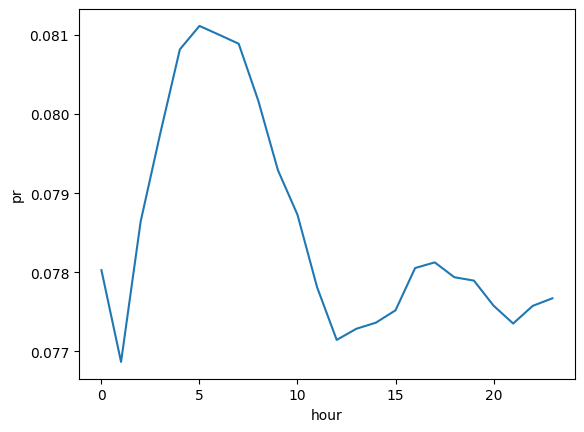

In [18]:
ds_p.mean(dim=['lat','lon']).pr.plot()